In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load and Explore the Dataset


In [5]:
df = pd.read_csv("Data/Student_Performance.csv")
print(df.shape)    
print(df.info())    
df.head()

(10000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


- Check duplicates:

In [4]:
df.duplicated().sum()


np.int64(127)

- Remove duplicates

In [6]:
df = df.drop_duplicates()

- Confirm removal

In [7]:
print(df.duplicated().sum())
print(df.shape)

0
(9873, 6)


- Summary stats

In [5]:
df.describe()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


- Histograms

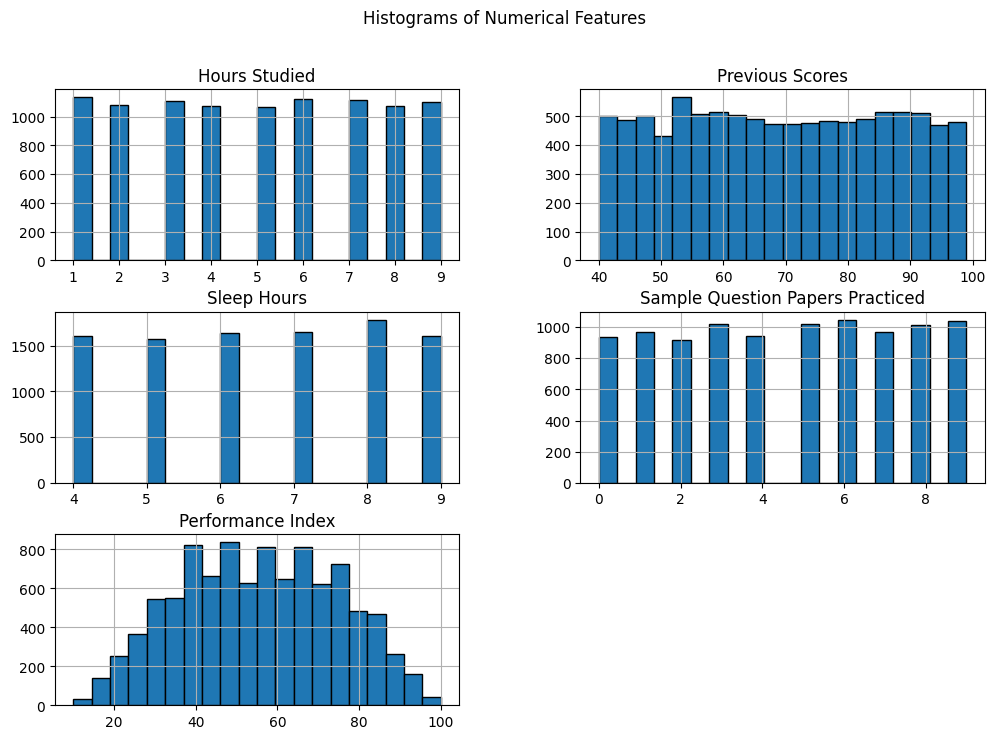

In [9]:
df.hist(figsize=(12,8), bins=20, edgecolor="black")
plt.suptitle("Histograms of Numerical Features")
plt.show()


-  Boxplots

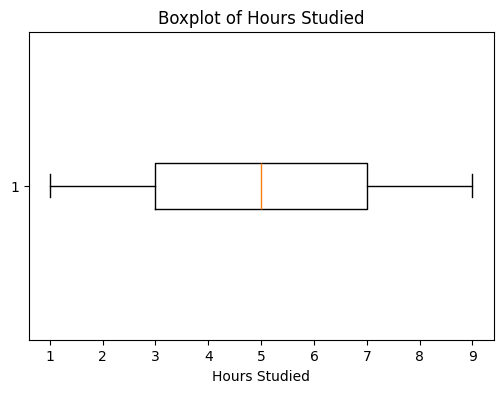

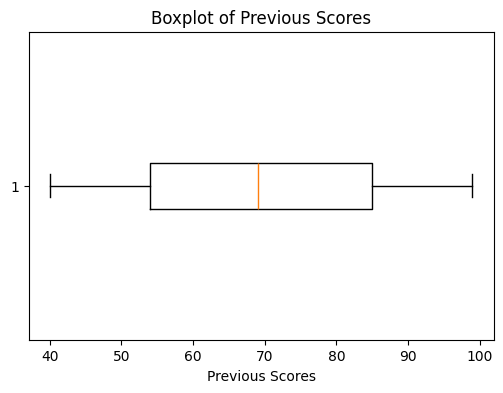

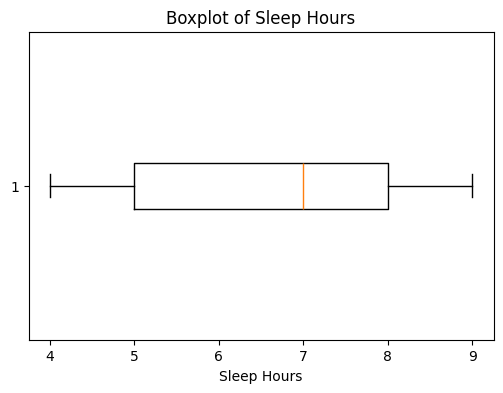

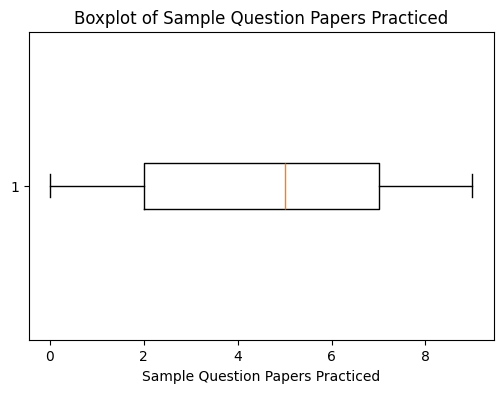

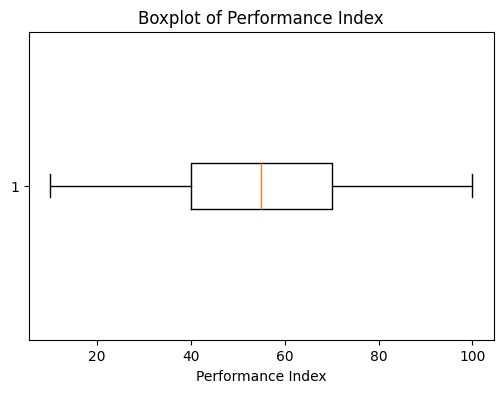

In [10]:
for col in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()


- Scatterplots (relationships)

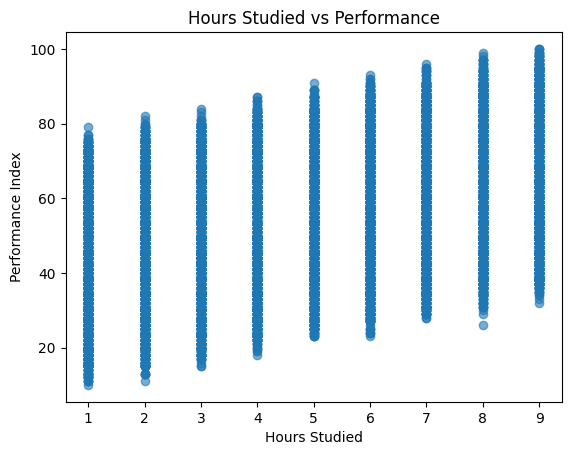

In [13]:
plt.scatter(df["Hours Studied"], df["Performance Index"], alpha=0.6)
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.title("Hours Studied vs Performance")
plt.show()



In [16]:
print(df.columns)


Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


- To know the missing values in our datasat

In [14]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

- correlation Heatmaping

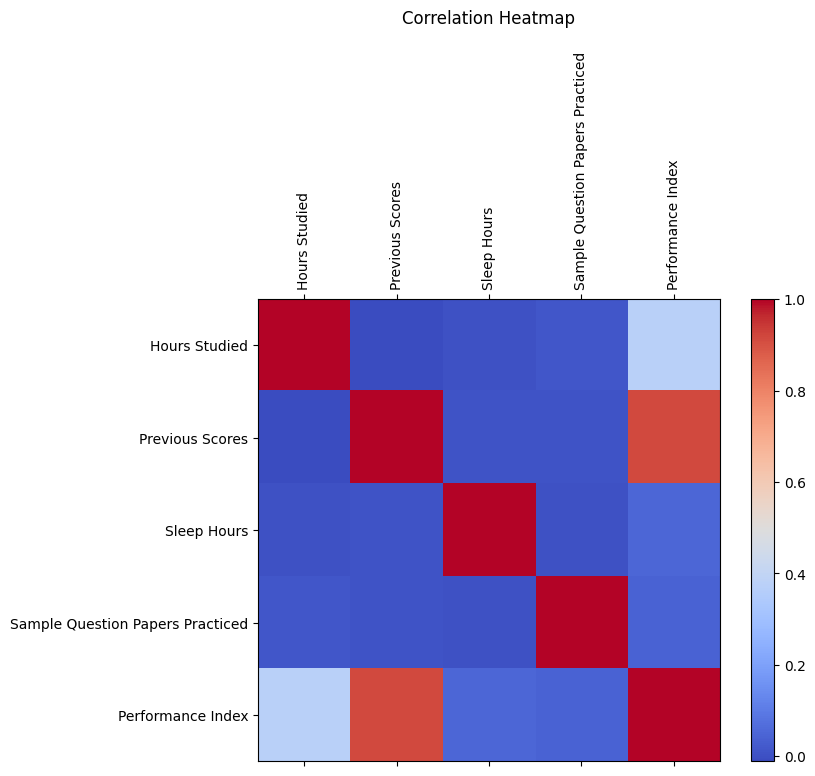

In [20]:

numeric_df = df.select_dtypes(include=["int64", "float64"])


corr = numeric_df.corr()


fig, ax = plt.subplots(figsize=(8,6))
cax = ax.matshow(corr, cmap="coolwarm")

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

fig.colorbar(cax)
plt.title("Correlation Heatmap", pad=20)
plt.show()


# 2. Data Preprocessing

- Encode categorical variables

In [22]:
df_encoded = pd.get_dummies(df, drop_first=True)

- Define features & target

In [26]:
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop("Performance Index", axis=1)
y = df_encoded["Performance Index"]

- Split into train & test sets

In [7]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 3. Build Regression Model

- Import and train

In [9]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


- Check coefficients

In [32]:
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)
print(coef_df)


                            Feature  Coefficient
0                     Hours Studied     2.851022
1                   Previous Scores     1.018430
4    Extracurricular Activities_Yes     0.573823
2                       Sleep Hours     0.472073
3  Sample Question Papers Practiced     0.188704


# 4. Evaluate the Model

- Make predictions

In [34]:
y_pred = model.predict(X_test)

- Evaluate metrics

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


MSE: 4.305900938538476
RMSE: 2.075066490148804
R²: 0.9884301209927054


# 5- Add normalization

In [1]:
from sklearn.preprocessing import StandardScaler

In [10]:
# 1. Encode categorical variable
df_encoded = pd.get_dummies(df, drop_first=True)

# 2. Features and target
X = df_encoded.drop("Performance Index", axis=1)
y = df_encoded["Performance Index"]

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 6. Coefficients
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coef_df)

                            Feature  Coefficient
1                   Previous Scores    17.637271
0                     Hours Studied     7.401341
2                       Sleep Hours     0.810031
3  Sample Question Papers Practiced     0.548842
4    Extracurricular Activities_Yes     0.304291


# 6- add SGDRegressor

In [14]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

In [15]:
sgd_pipe = make_pipeline(
    StandardScaler(),
    SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
)


sgd_pipe.fit(X_train, y_train)


y_pred_sgd = sgd_pipe.predict(X_test)

In [16]:
coef_sgd = pd.DataFrame({
    "feature": X.columns,
    "coefficient": sgd_pipe.named_steps["sgdregressor"].coef_
})
print(coef_sgd)


                            feature  coefficient
0                     Hours Studied     7.348641
1                   Previous Scores    17.643053
2                       Sleep Hours     0.805436
3  Sample Question Papers Practiced     0.552458
4    Extracurricular Activities_Yes     0.300579
